In [2]:
import sys, os
import yaml
from hypnotoad import tokamak
from hypnotoad.core.mesh import BoutMesh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from xbout import open_boutdataset
from hermes3.grid_fields import *
# import h5py

# %matplotlib qt
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

# Read 

In [23]:
# gridname = "1a-from_Ben"
# gridname = "1b-halfres"
gridname = "2a-halfres_nonorthog"
path = os.path.join(r"C:\Users\Mike\OneDrive\Project\collab\tech\grid\COMPASS")
path_yaml = os.path.join(path, f"{gridname}.yml")
path_grid = os.path.join(path, f"{gridname}.nc")


    

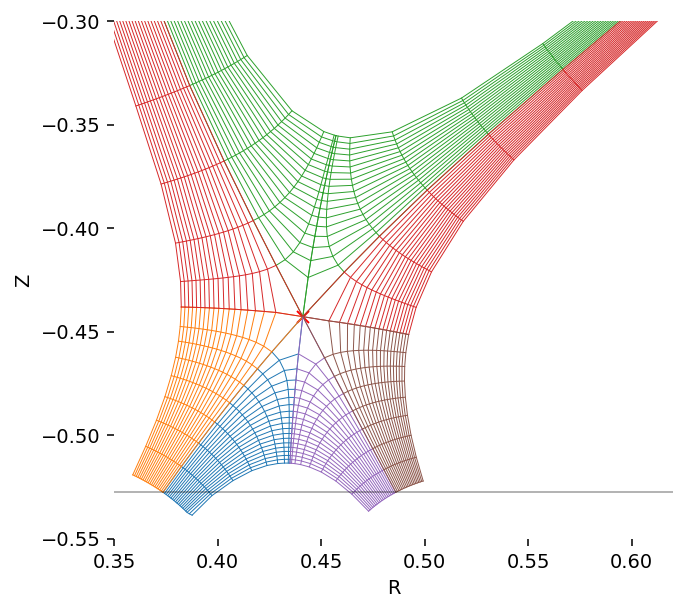

In [20]:
def plot(loc):
    
    fig, ax = plt.subplots(dpi = 140)
    ax.plot(*eq.x_points[0], "rx",)
    # mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 2)
    mesh.plotGridCellEdges(ax = ax, lw = 0.5)
    eq.plotWall(axis = ax, linewidth = 1, alpha = 0.3)
    ax.grid(False)
    ax.legend('', frameon=False)
    
    ax.set_xlabel("R")
    ax.set_ylabel("Z")
    ax.set_aspect(1)
    
    
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    
    # ax.xaxis.label.set_visible(False)
    # ax.yaxis.label.set_visible(False)
    
    ax.set_frame_on(False)
    
    if loc == "lower":
        ax.set_xlim([0.35, 0.62]); ax.set_ylim([-0.55,-0.3])     # Both lower divertors
    elif loc == "lower_zoom":
        ax.set_xlim([0.25, 0.6]); ax.set_ylim([-0.9,-0.7])     # Both lower divertors zoom
    elif loc == "inner_upper":
        ax.set_xlim([0.20, 0.45]); ax.set_ylim([0.6,0.8])     # Inner upper leg
    elif loc == "omp":
        ax.set_xlim([0.62, 0.800]); ax.set_ylim([-0.08,0])     # OMP
    elif loc == "imp":
        ax.set_xlim([0.12, 0.300]); ax.set_ylim([-0.15,0.05])     # IMP
    else:
        raise ValueError("Invalid location")
    
    ## PLOT REFERENCE
    # mesh2 = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3e2-lores_widev2.nc")
    # kwargs = dict(s= 10, zorder = 20, c = "k")
    # slicer = mesh2.slices("core_edge")
    # ax.scatter(mesh2.mesh["Rxy"][slicer].flatten(), mesh2.mesh["Zxy"][slicer].flatten(), label = "Reference", **kwargs)
    # slicer = mesh2.slices("sol_edge")
    # ax.scatter(mesh2.mesh["Rxy"][slicer].flatten(), mesh2.mesh["Zxy"][slicer].flatten(), **kwargs)
    # mesh2.close()
    
    plt.savefig(os.path.join(path, gridname + ".png"), dpi = 400, bbox_inches = "tight")
plot("lower") 

## Initial gridding

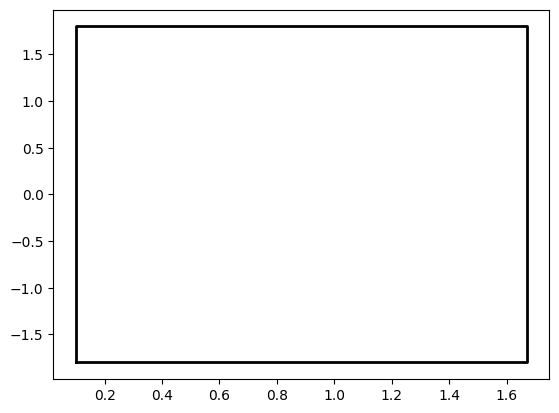

In [45]:
eq.
eq.plotWall()

In [44]:
with open(r"C:\Users\Mike\OneDrive\Project\python-packages\Hypnotoad\integrated_tests\grid_files\test_connected-double-null.eqdsk") as fh:
    eq = tokamak.read_geqdsk(fh, settings=options, nonorthogonal_settings=options)

  nx = 65, ny = 65

Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
extrapolate_profiles                              |  False           (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  5e-16                      
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  1.0                        
finecontour_maxits                                |  1000                       
finecontour_overdamping_factor                    |  0.8             (default)  
leg_refine_atol                                   |  2e-16                      
leg_refine_maxits                                 |  10000                      
leg_trace_atol                                    |  5.0000000000000005e-12 (defa

c:\pyenvs\fusion312\Lib\site-packages\scipy\integrate\_ivp\common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


Generating a connected double null


In [27]:
with open(path_yaml) as f:
	options = yaml.safe_load(f)

with open(r"C:\Users\Mike\OneDrive\Project\collab\tech\grid\COMPASS\compass.geqdsk") as fh:
    eq = tokamak.read_geqdsk(fh, settings=options, nonorthogonal_settings=options)

mesh = BoutMesh(eq, options)
mesh.calculateRZ()
plot("lower")

  nx = 256, ny = 256

Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
extrapolate_profiles                              |  False           (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  5e-16                      
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  1.0                        
finecontour_maxits                                |  1000                       
finecontour_overdamping_factor                    |  0.8             (default)  
leg_refine_atol                                   |  2e-16                      
leg_refine_maxits                                 |  10000                      
leg_trace_atol                                    |  5.0000000000000005e-12 (de

SolutionError: refinePoint failed to converge with methods: ['line']

## Regrid
- Warning: only takes into accounts new nonorthogonal parameters

redistributing inner_lower_divertor(0)
redistributing inner_lower_divertor(1)7
redistributing inner_core(0)
redistributing inner_core(1)
redistributing7 17 20 inner_upper_divertor(0)
redistributing inner_upper_divertor(1) 18
redistributing outer_upper_divertor(0)
redistributing outer_upper_divertor(1)
redistributing outer_core(0)
redistributing3 outer_core(1)
redistributing outer_lower_divertor(0)
redistributing4 14 18 outer_lower_divertor(1)
Get RZ values05 12 15


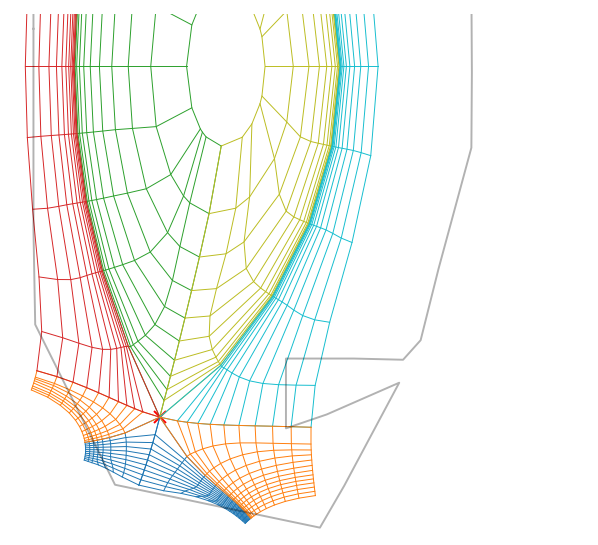

In [86]:
with open(path_yaml) as f:
	options = yaml.safe_load(f)

mesh.redistributePoints(options)
mesh.calculateRZ()
plot("lower")

# Save

In [23]:
mesh.geometry()
mesh.writeGridfile(path_grid)


Calculate geometry
Distances inner_lower_divertor(0)
Distances inner_lower_divertor(1)
Distances inner_core(0)
Distances inner_core(1)
Distances inner_upper_divertor(0)
Distances inner_upper_divertor(1)
Distances outer_upper_divertor(0)
Distances outer_upper_divertor(1)
Distances outer_core(0)
Distances outer_core(1)
Distances outer_lower_divertor(0)
Distances outer_lower_divertor(1)
1 inner_lower_divertor(0)
1 inner_lower_divertor(1)
1 inner_core(0)
1 inner_core(1)
1 inner_upper_divertor(0)
1 inner_upper_divertor(1)
1 outer_upper_divertor(0)
1 outer_upper_divertor(1)
1 outer_core(0)
1 outer_core(1)
1 outer_lower_divertor(0)
1 outer_lower_divertor(1)


C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1374: UserWarning: need to check that this is correct for non-orthogonal grids
  warnings.warn("need to check that this is correct for non-orthogonal grids")


Calculate zShiftrtor(1) calcHy 20 / 21
Calculate Metricrtor(1))ivertor(1) inner_core(1)


C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1795: RuntimeWarning: divide by zero encountered in divide
  result.xlow[1:-1, :] = (f.centre[1:, :] - f.centre[:-1, :]) / self.dx.xlow[
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1802: RuntimeWarning: divide by zero encountered in divide
  result.xlow[0, :] = (f.centre[0, :] - f.xlow[0, :]) / (
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1807: RuntimeWarning: divide by zero encountered in divide
  result.xlow[-1, :] = (f_outer - f.centre[-1, :]) / self.dx.xlow[-1, :]
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1818: RuntimeWarning: divide by zero encountered in divide
  result.corners[1:-1, :] = (
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1825: RuntimeWarning: divide by zero encountered in divide
  result.corners[0, :] = (f.ylow[0, :] - f.corners[0, :]) / (

# Plot grids

In [47]:
eq.plotWall?

Signature: eq.plotWall(axis=None, *, color='k', linestyle='-', linewidth=2, **kwargs)
Docstring: <no docstring>
File:      c:\users\mike\onedrive\project\python-packages\hypnotoad\hypnotoad\core\equilibrium.py
Type:      method

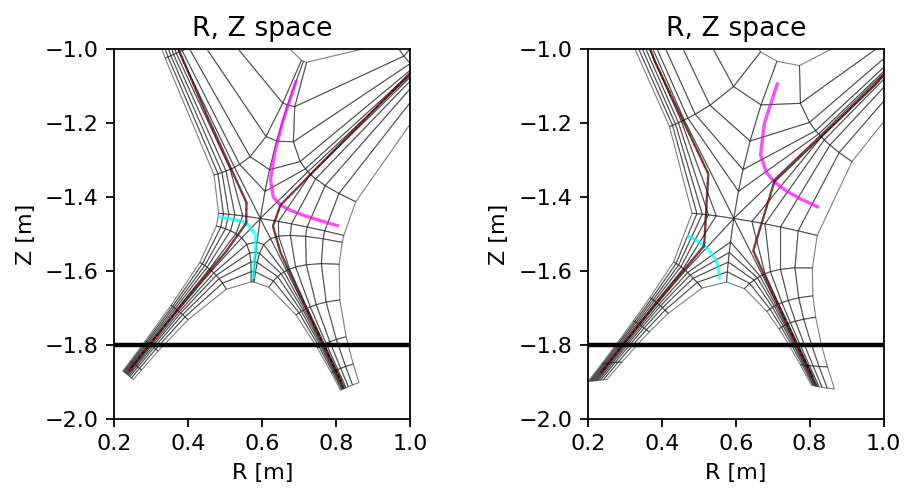

In [48]:
orthogonal = r"C:\Users\Mike\OneDrive\Project\python-packages\Hypnotoad\integrated_tests\connected_doublenull_orthogonal\expected_orthogonal.grd.nc"
nonorthog = r"C:\Users\Mike\OneDrive\Project\python-packages\Hypnotoad\integrated_tests\connected_doublenull_nonorthogonal\expected_nonorthogonal.grd.nc"


from hermes3.grid_fields import Mesh as sdMesh

fig, axes = plt.subplots(1,2, figsize = (7,3), dpi = 160)
ax = axes[0]
sdMesh(orthogonal).plot_rz_grid(ax = ax)

ax = axes[1]
sdMesh(nonorthog).plot_rz_grid(ax = ax)

for ax in axes:
    eq.plotWall(axis = ax)
    ax.grid(False)
    ax.legend().set_visible(False)
    ax.set_xlim(0.2, 1.0)
    ax.set_ylim(-2.0, -1.0)

# Junk

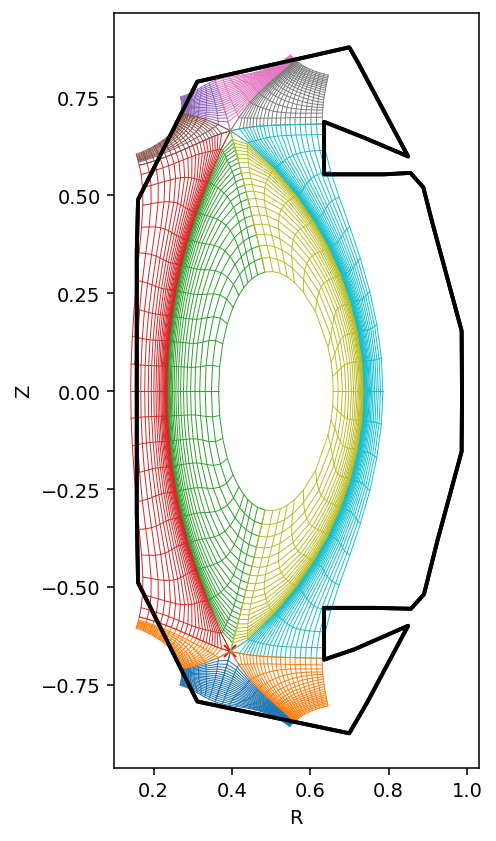

In [8]:
fig, ax = plt.subplots(figsize = (5,7), dpi = 140)
# eq.plotPotential(ncontours=200, axis = ax, linewidths = 0.5)
eq.plotWall(axis = ax)
ax.plot(*eq.x_points[0], "rx",)
# mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 2)
mesh.plotGridCellEdges(ax = ax, lw = 0.5)
eq.plotWall(axis = ax)
ax.grid(False)
ax.legend('', frameon=False)
# ax.set_xlim([0.15, 0.75]); ax.set_ylim([-0.86,-0.1])     # Both lower divertors
# ax.set_xlim([0.25, 0.6]); ax.set_ylim([-0.9,-0.7])     # Both lower divertors zoom
# ax.set_xlim([0.20, 0.45]); ax.set_ylim([0.6,0.8])     # Inner upper leg
# ax.set_xlim([0.62, 0.800]); ax.set_ylim([-0.08,0])     # OMP
# ax.set_xlim([0.12, 0.300]); ax.set_ylim([-0.15,0.05])     # IMP
ax.set_xlabel("R")
ax.set_ylabel("Z")
ax.set_aspect(1)